In [1]:
%load_ext autoreload
%autoreload 2
from HNLDecayWidths import get_decay_widths
import numpy as np
import matplotlib.pyplot as plt
import siren

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return color_list#base.from_list(cmap_name, color_list, N)

latex_labels = {"NuLight":r"\nu",
                "NuE":r"\nu_e",
                "NuMu":r"\nu_\mu",
                "NuTau":r"\nu_\tau"}

for meson in ["Qball","Pi","K","D","Ds","Rho","KPrime","Eta","EtaPrime","Omega","Phi","E","Mu","Tau"]:
    lmeson = meson
    if meson=="Ds": lmeson = "D_s"
    if meson=="Pi": lmeson = "\pi"
    if meson=="Rho": lmeson = r"\rho"
    if meson=="Eta": lmeson = "\eta"
    if meson=="KPrime": lmeson = "K'"
    
    if meson=="EtaPrime": lmeson = "\eta'"
    if meson=="Phi": lmeson = "\phi"
    if meson=="Omega": lmeson = "\omega"
    if meson=="E": lmeson = "e"
    if meson=="Mu": lmeson = "\mu"
    if meson=="Tau": lmeson = r"\tau"
    latex_labels["Hadrons"] = "Hadrons"
    latex_labels["%s"%meson] = "%s"%lmeson
    latex_labels["%s0"%meson] = "%s^0"%lmeson
    latex_labels["%sPlus"%meson] = "%s^+"%lmeson
    latex_labels["%sMinus"%meson] = "%s^-"%lmeson

In [3]:
mrange = np.linspace(0.01,3,100)
mrange = np.linspace(0.01,2,100)
mrange = np.linspace(1,2,100)
mrange = np.logspace(0,4,100)

decay_width_dict_e = {}
decay_width_dict_mu = {}
decay_width_dict_tau = {}
decay_width_dict_all = {}

Ue4 = 0
Umu4 = 1
Utau4 = 0

for m4 in mrange:
    print("%2.2f/%2.2f"%(m4,mrange[-1]),end="\r")
    print()
    
    # e only
    decay_widths = get_decay_widths(m4, 1, 0, 0)
    for channel,width in decay_widths.items():
        if channel not in decay_width_dict_e.keys():
            decay_width_dict_e[channel] = []
        decay_width_dict_e[channel].append([m4,width])
        
    # mu only
    decay_widths = get_decay_widths(m4, 0, 1, 0)
    for channel,width in decay_widths.items():
        if channel not in decay_width_dict_mu.keys():
            decay_width_dict_mu[channel] = []
        decay_width_dict_mu[channel].append([m4,width])
        
    # tau only
    decay_widths = get_decay_widths(m4, 0, 0, 1)
    for channel,width in decay_widths.items():
        if channel not in decay_width_dict_tau.keys():
            decay_width_dict_tau[channel] = []
        decay_width_dict_tau[channel].append([m4,width])
        
    # # all flavors
    # decay_widths = get_decay_widths(m4, 1./3., 1./3., 1./3.)
    # for channel,width in decay_widths.items():
    #     if channel not in decay_width_dict_all.keys():
    #         decay_width_dict_all[channel] = []
    #     decay_width_dict_all[channel].append([m4,width])

1.00/10000.00
Directory '/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/nkamp/spack/var/spack/environments/lienv/.spack-env/view/lib/python3.10/site-packages/siren/resources/CrossSections/DarkNewsTables/DarkNewsTables-v0.4.2/HNL_M1.00e+00_e+1.00e+00_mu0.00e+00_tau0.00e+00/CrossSection_H1_p-el_nu(mu)_N4_flipping_/' created successfully
Directory '/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/nkamp/spack/var/spack/environments/lienv/.spack-env/view/lib/python3.10/site-packages/siren/resources/CrossSections/DarkNewsTables/DarkNewsTables-v0.4.2/HNL_M1.00e+00_e+1.00e+00_mu0.00e+00_tau0.00e+00/Decay_N4_nu_light_1_mu+mu-_/' created successfully
Directory '/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/nkamp/spack/var/spack/environments/lienv/.spack-env/view/lib/python3.10/site-packages/siren/resources/CrossSections/DarkNewsTables/DarkNewsTables-v0.4.2/HNL_M1.00e+00_e+1.00e+00_mu0.00e+00_tau0.00e+00/Decay_N4_nu_light_1_e+e-_/' created successfully
Directory '/n/holylfs05/LABS/arguelles_

/tmp/ipykernel_3158350/502091256.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base = plt.cm.get_cmap(base_cmap)


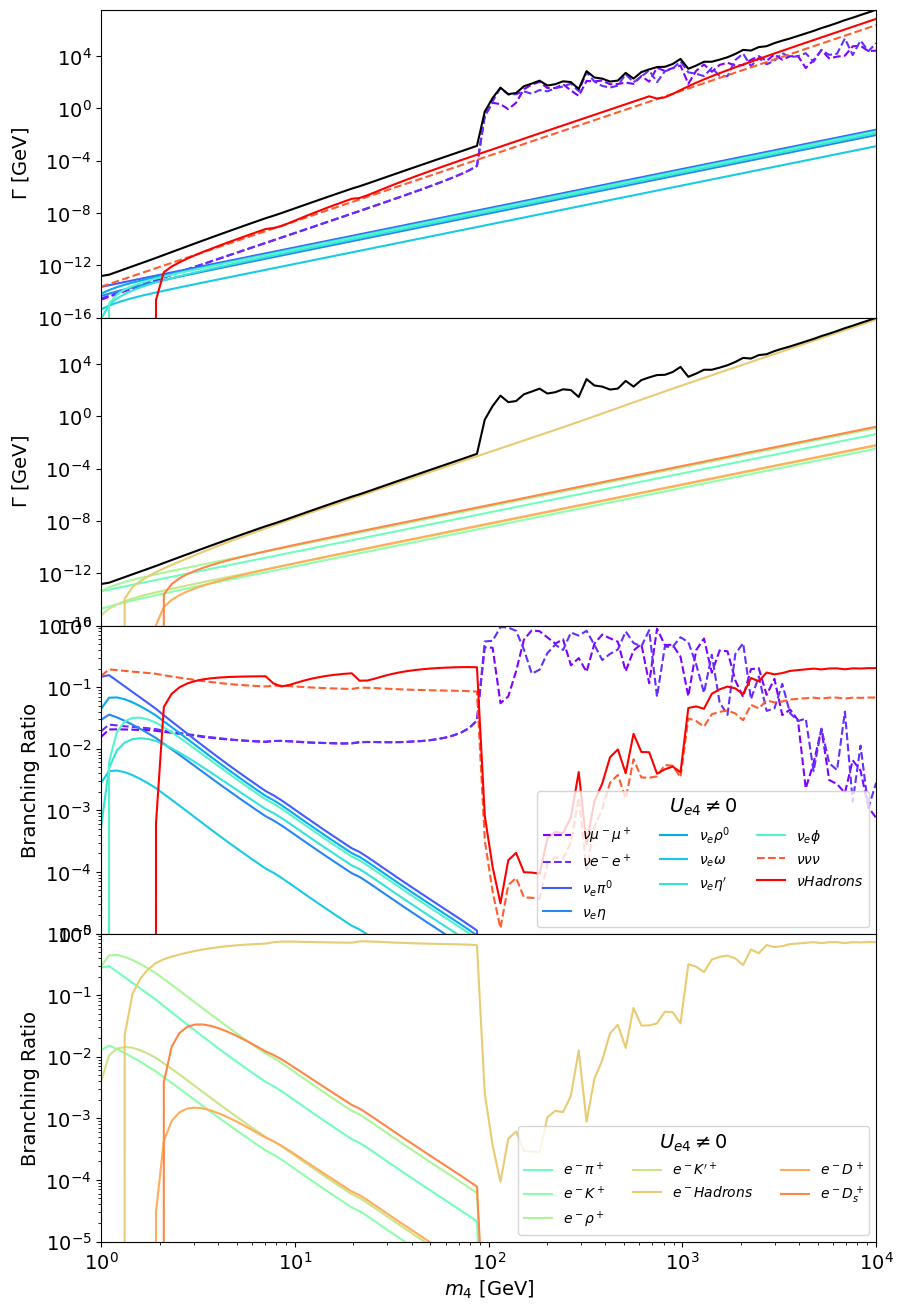

/tmp/ipykernel_3158350/502091256.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base = plt.cm.get_cmap(base_cmap)


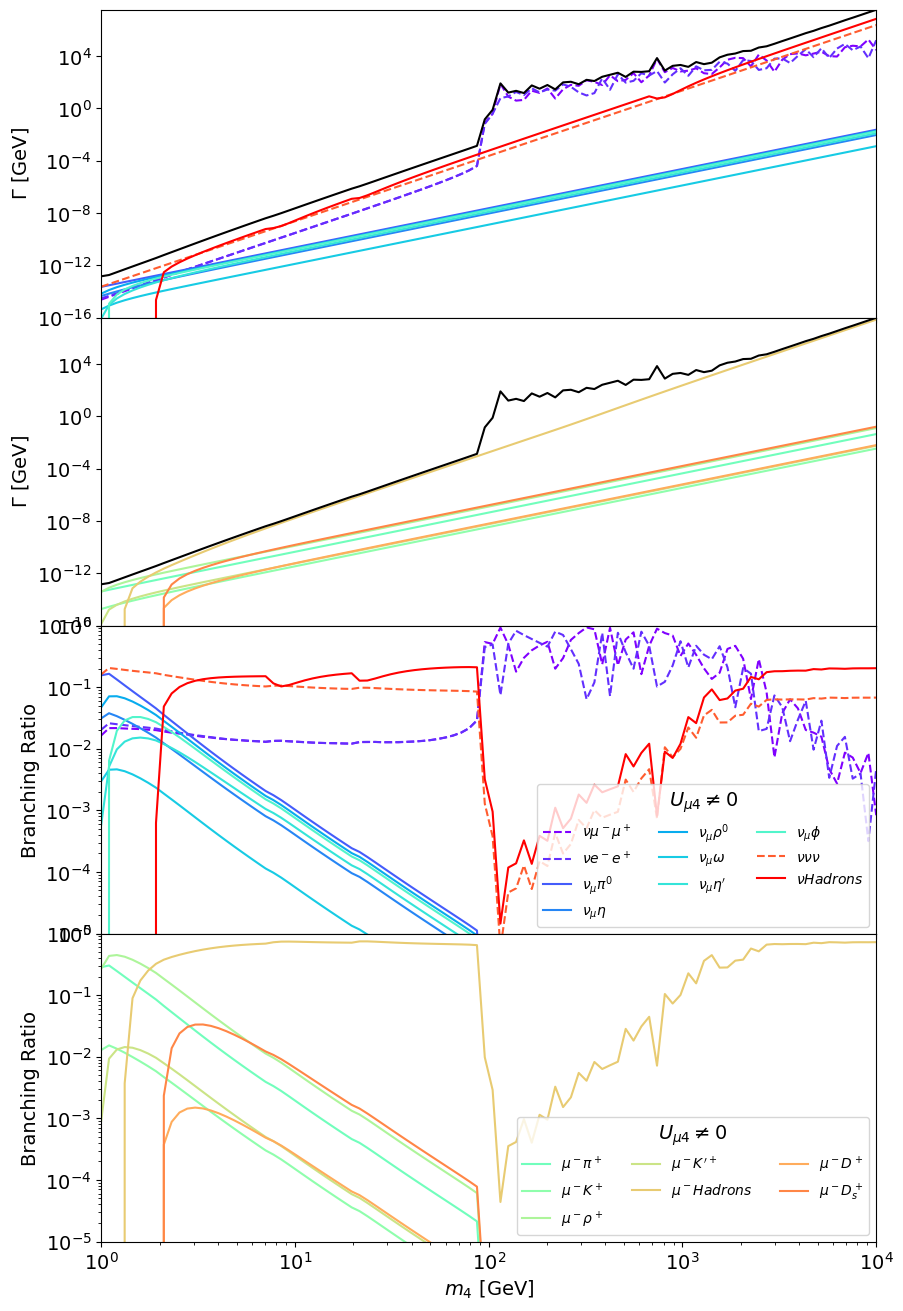

/tmp/ipykernel_3158350/502091256.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base = plt.cm.get_cmap(base_cmap)


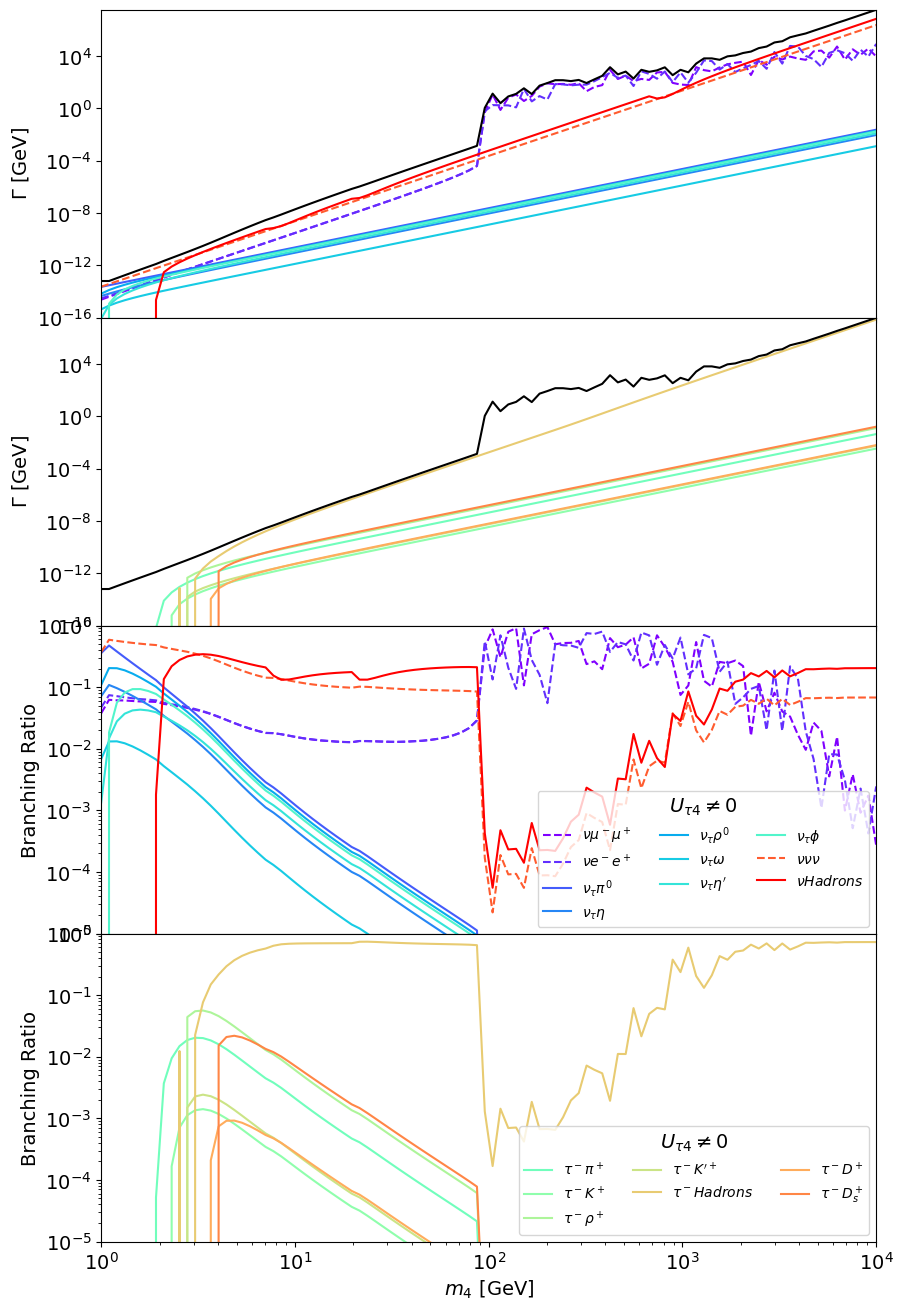

In [4]:

for i,decay_width_dict in enumerate([decay_width_dict_e,
                                      decay_width_dict_mu,
                                      decay_width_dict_tau,
                                      #decay_width_dict_all
                                    ]):
    
    fig,ax = plt.subplots(4,1,figsize=(10,16),sharex=True)
    plt.subplots_adjust(wspace=0, hspace=0)
    
    N = sum([sum(np.array(x)[:,-1])>0 for x in decay_width_dict.values()])
        
    colormap = discrete_cmap(N,base_cmap="rainbow")
    ic = 0

    for channel,widths in decay_width_dict.items():
        if sum(np.array(widths)[:,1]) <= 0: 
            continue
        color = colormap[ic]
        ls="-"
        ic+=1
        if channel=="total": 
            label = "Total"
            color = "black"
        if len(channel)==2:
            label = r"$%s"%(latex_labels[str(channel[0])[13:]]) + \
                    r" %s$"%(latex_labels[str(channel[1])[13:]])
        elif len(channel)==3:
            label = r"$%s"%(latex_labels[str(channel[0])[13:]]) + \
                    r" %s"%(latex_labels[str(channel[1])[13:]]) + \
                    r" %s$"%(latex_labels[str(channel[2])[13:]])
            ls = "--"
        if channel!="total":
            if channel[0] in [siren.dataclasses.Particle.NuE,
                              siren.dataclasses.Particle.NuMu,
                              siren.dataclasses.Particle.NuTau,
                              siren.dataclasses.Particle.NuLight]:
                axnum = 0  
            else:
                axnum = 1
            ax[axnum].plot(np.array(widths)[:,0],np.array(widths)[:,1],color=color,ls=ls)
            mass_flag = np.array(widths)[:,0]
            mass_indices = np.where(np.in1d(np.array(decay_width_dict["total"])[:,0], np.array(widths)[:,0]))[0]
            y = np.array(widths)[:,1]/(np.array(decay_width_dict["total"])[mass_indices,1])
            ax[axnum+2].plot(np.array(widths)[:,0],y,label=label,color=color,ls=ls)
        else:
            ax[0].plot(np.array(widths)[:,0],np.array(widths)[:,1],color=color,ls=ls)
            ax[1].plot(np.array(widths)[:,0],np.array(widths)[:,1],color=color,ls=ls)
    ax[3].set_xlabel(r"$m_4$ [GeV]",fontsize=14)
    ax[0].set_ylabel(r"$\Gamma$ [GeV]",fontsize=14)
    ax[1].set_ylabel(r"$\Gamma$ [GeV]",fontsize=14)
    ax[2].set_ylabel(r"Branching Ratio",fontsize=14)
    ax[3].set_ylabel(r"Branching Ratio",fontsize=14)
    ax[0].set_xlim(mrange[0],mrange[-1])
    ax[0].set_ylim(1e-16)
    ax[1].set_ylim(1e-16)
    ax[2].set_ylim(1e-5,1)
    ax[3].set_ylim(1e-5,1)
    for _i in range(4):
        ax[_i].loglog()
        ax[_i].tick_params(axis="both",labelsize=14)
    if i==0: title = r"$U_{e 4} \neq 0$"
    if i==1: title = r"$U_{\mu 4} \neq 0$"
    if i==2: title = r"$U_{\tau 4} \neq 0$"
    if i==3: title = r"$U_{e 4} = U_{\mu 4} = U_{\tau 4}$"
    l1 = ax[2].legend(ncol=3,title=title)
    l2 = ax[3].legend(ncol=3,title=title)
    l1.get_title().set_fontsize('14')
    l2.get_title().set_fontsize('14')
    plt.savefig("DecayWidths%d.pdf"%i,dpi=100)
    plt.show()

# Estimating Hadronic Decay Mode

In [4]:
import siren
from scipy.integrate import quad
import siren.utilities.Constants as Constants
import numpy as np

# see https://pdg.lbl.gov/2020/reviews/rpp2020-rev-quark-masses.pdf for quark masses
mu = 2.32e-3
md = 4.71e-3
ms = 92.9e-3
me = 0.511e-3
mmu = 105.6e-3
mtau = 1.776

def lam(a,b,c):
    return a**2 + b**2 + c**2 - 2*a*b - 2*a*c - 2*b*c

def integrand(x,xu,xd,xl):
    return 1./x * (x - xl**2 - xd**2) * (1 + xu**2 - x) * np.sqrt(lam(x,xl**2,xd**2)*lam(1,x,xu**2))

def I(xu,xd,xl):
    return 12 * quad(integrand,(xd+xl)**2,(1-xu)**2,args=(xu,xd,xl))[0]

def GammaCC(U,mN,mu,md,ml,Nw=1):
    xu = mu/mN
    xd = md/mN
    xl = ml/mN
    if(xu+xd+xl>1): return 0
    return Nw * Constants.FermiConstant**2 * mN**5 / (192*Constants.pi**3) * U**2 * I(xu,xd,xl)

def L(x,thresh=3e-3):
    num = 1 - 3 * x**2 - (1 - x**2) * np.sqrt(1 - 4 * x**2)
    num = np.where(x<thresh,2*x**6 + 6*x**8 + 18*x**10,num)
    denom = x**2 * (1 + np.sqrt(1 - 4 * x**2))
    return np.log(num/denom)
    
def GammaNC(U,mN,mf,Nz=1,fs="qup"):
        
    if fs=="qup":
        C1f = 1./4. * (1 - 8./3. * Constants.thetaWeinberg + 32./9. * Constants.thetaWeinberg**2)
        C2f = 1./3. * Constants.thetaWeinberg * (4./3. * Constants.thetaWeinberg - 1)
    elif fs=="qdown":
        C1f = 1./4. * (1 - 4./3. * Constants.thetaWeinberg + 8./9. * Constants.thetaWeinberg**2)
        C2f = 1./6. * Constants.thetaWeinberg * (2./3. * Constants.thetaWeinberg - 1)
    else:
        return 0
    
    x = mf/mN
    if (2*x>=1): return 0
    prefactor = Nz * Constants.FermiConstant**2 * mN**5 / (192*Constants.pi**3) * U**2
    factor1 = (1 - 14 * x**2 - 2 * x**4 - 12 * x**6)*np.sqrt(1 - 4 * x**2) + 12 * x**4 * (x**4 - 1) * L(x)
    factor2 = x**2 * (2 + 10 * x*82 - 12 * x**4) * np.sqrt(1 - 4 * x**2) + 6 * x**4 * (1 - 2 * x**2 + 2 * x**4) * L(x)
    return prefactor * (C1f*factor1 + 4*C2f*factor2)
    

In [5]:
mrange = np.linspace(0,5,1000)

gamma_e = {}
gamma_mu = {}
gamma_tau = {}
for key in ["CCud","CCus","NCuu","NCdd","NCss"]:
    gamma_e[key] = np.zeros_like(mrange)
    gamma_mu[key] = np.zeros_like(mrange)
    gamma_tau[key] = np.zeros_like(mrange)
for i,mN in enumerate(mrange):
    print(i,end="\r")
    for gamma,ml in zip([gamma_e,gamma_mu,gamma_tau],
                        [me,mmu,mtau]):
        gamma["CCud"][i] = GammaCC(1,mN,mu,md,ml,Nw=3*Constants.Vud)
        gamma["CCus"][i] = GammaCC(1,mN,mu,ms,ml,Nw=3*Constants.Vus)
        gamma["NCuu"][i] = GammaNC(1,mN,mu,Nz=3,fs="qup")
        gamma["NCdd"][i] = GammaNC(1,mN,md,Nz=3,fs="qdown")
        gamma["NCss"][i] = GammaNC(1,mN,ms,Nz=3,fs="qdown")

/tmp/ipykernel_2767314/2506332540.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  xu = mu/mN
/tmp/ipykernel_2767314/2506332540.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  xd = md/mN
/tmp/ipykernel_2767314/2506332540.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  xl = ml/mN
/tmp/ipykernel_2767314/2506332540.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  x = mf/mN


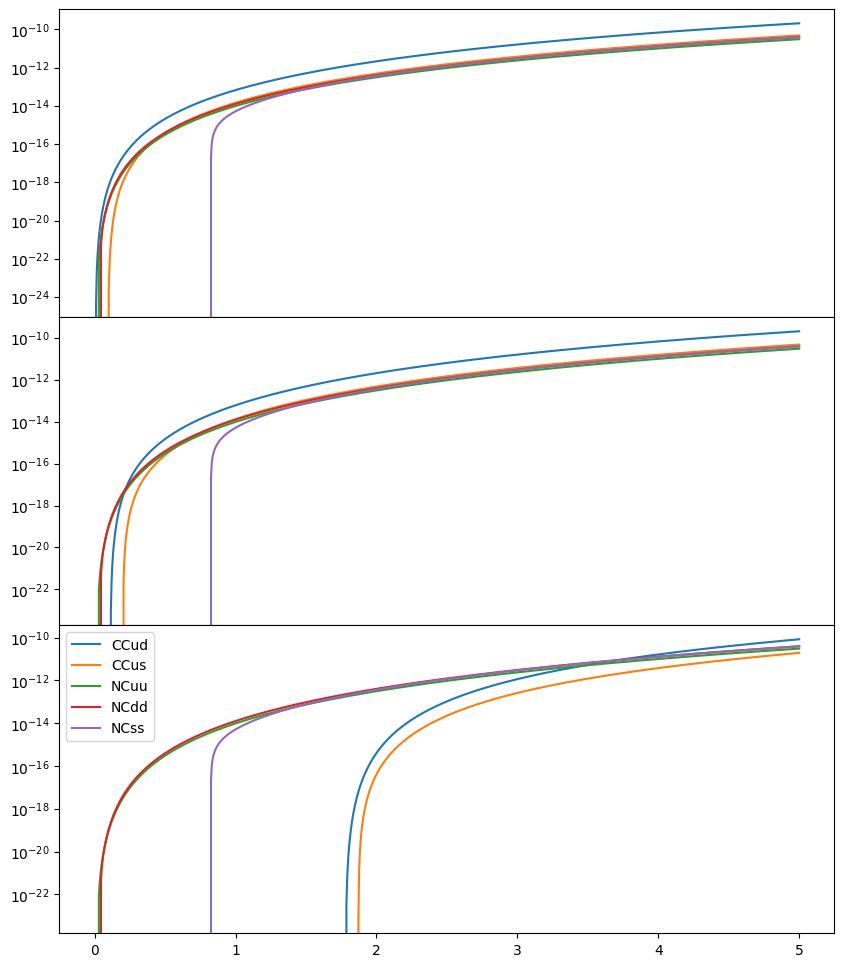

In [6]:
fig,ax = plt.subplots(3,1,figsize=(10,12),sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

for ig,gamma in enumerate([gamma_e,gamma_mu,gamma_tau]):
    ax[ig].semilogy()
    for k,widths in gamma.items():
        ax[ig].plot(mrange,widths,label=k)

plt.legend()
plt.show()

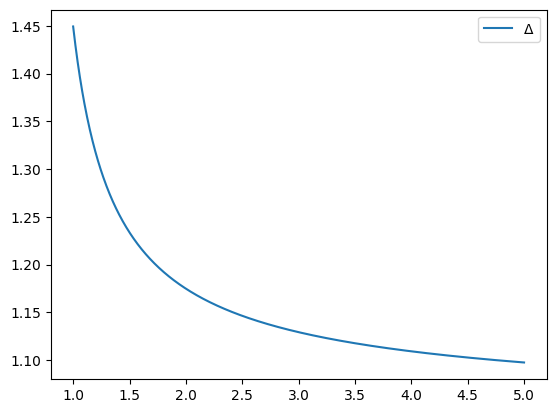

In [7]:
from HNLDecayWidths import DeltaQCD
mhad_range = np.linspace(1,5,1000)
alphasTau = np.zeros_like(mhad_range)
alphasZ = np.zeros_like(mhad_range)
Delta = np.zeros_like(mhad_range)
flavor_thresholds = np.array([1.5,4.8,173.21])
nl = 4 #loops
for im,m in enumerate(mhad_range):
    nf = int(3 + sum(m>flavor_thresholds))
    #alphasTau[im] = crd.AlphasExact(0.332,1.7768,m,nf,nl)
    #alphasZ[im] = crd.AlphasExact(0.1179,91.1876,m,nf,nl)
    Delta[im] = DeltaQCD(m,nl=5)
#plt.plot(mhad_range,alphasTau,label=r"$\tau$")
#plt.plot(mhad_range,alphasZ,label=r"$Z$")
plt.plot(mhad_range,1+Delta,label=r"$\Delta$")
plt.legend()
#plt.loglog()
#plt.ylim(0,0.5)
plt.show()

# GammaHadCC = {m_l:np.zeros_like(mrange) for m_l in [me,mmu,mtau]}
# for im,m_N in enumerate(mrange):
#     for m_l in [me,mmu,mtau]:
#         if m_N<=1:
#             GammaHadCC[m_l][im] = 0
#         else:
#             GammaHadCC[m_l][im] = GammaHadronsCC(m_N,m_l)
# for m_l in [me,mmu,mtau]:
#     plt.plot(mrange,GammaHadCC[m_l],label=m_l)
# plt.legend()
# plt.semilogy()
# plt.show()

# figure out hadron delta situation

[]

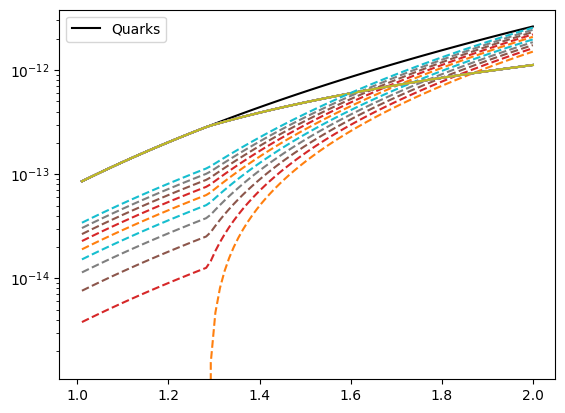

In [8]:
kQuarks = tuple([siren.dataclasses.Particle.EMinus,
                 siren.dataclasses.Particle.Qball])
kHadrons = tuple([siren.dataclasses.Particle.EMinus,
                  siren.dataclasses.Particle.Hadrons])

widthsQuarks = np.array(decay_width_dict_e[kQuarks])
widthsHadrons = np.array(decay_width_dict_e[kHadrons])
widthsHadrons[:,1] = np.where(widthsHadrons[:,1]<=0,0,widthsHadrons[:,1])

plt.plot(widthsQuarks[:,0],widthsQuarks[:,1],label="Quarks",color="black")

for delta in np.linspace(0,0.4,10):
    
    w1H = widthsQuarks[:,1] - widthsHadrons[1:,1]
    w3H = (1+delta)*widthsQuarks[:,1] - w1H
    plt.plot(widthsQuarks[:,0],w1H)
    plt.plot(widthsQuarks[:,0],w3H,ls="--")

plt.legend()
plt.semilogy()